In [16]:
# Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bse_data.csv')

print(df.head(5).to_string())

   number_siblings                   name  gender  age living_allowance  have_bf_gf                profession  daily_meals
0                1     Nakasujja Gertrude  female   33              NaN           1            Data Scientist            2
1                3  Arinda Asiimwe Atweta  female   23           50,000           1  Machine Learning Enginer            1
2                4    Ndjekornom Victoire    male   23           25,000           0            Data Scientist            1
3                0         KATURAMU EDGAR    male   27          500,000           0  Machine Learning Enginer            2
4                4      Abinsinguza Lasse    male   24          100,000           1            Data Scientist            2


In [17]:
# Check for duplicates
print(df.duplicated().sum())

0


In [18]:
# Data cleaning // preprocessing
# 1. Empty cells, 2. wrong formats, 3. wrong data, 4. Duplicates
# Check for missing values
print(df.isnull().sum())

number_siblings     0
name                0
gender              0
age                 0
living_allowance    7
have_bf_gf          0
profession          0
daily_meals         0
dtype: int64


In [19]:
#Check for wrong format
print(df.dtypes)

number_siblings      int64
name                object
gender              object
age                  int64
living_allowance    object
have_bf_gf           int64
profession          object
daily_meals          int64
dtype: object


In [20]:
# Check for wrong data
print(df['have_bf_gf'].unique())

[1 0]


In [ ]:
# Remove commas and convert to numeric
df['living_allowance'] = df['living_allowance'].str.replace(',', '')
df['living_allowance'] = pd.to_numeric(df['living_allowance'], errors='coerce')

# Calculate the median of the living_allowance column
median_value = df['living_allowance'].median()

# Fill NaN values with the median
df['living_allowance'].fillna(median_value, inplace=True)

# Print the first 8 rows of the dataframe
print(df.head(8).to_string())

In [26]:
# Data cleaning
# Check for missing values again
print(df.isnull().sum())

number_siblings     0
name                0
gender              0
age                 0
living_allowance    0
have_bf_gf          0
profession          0
daily_meals         0
dtype: int64


In [27]:
# Exploratory Data Analysis (EDA)
# Summary statistics

print(df.describe())

       number_siblings        age  living_allowance  have_bf_gf  daily_meals
count        36.000000  36.000000      3.600000e+01   36.000000    36.000000
mean          3.888889  24.055556      3.428333e+05    0.333333     2.277778
std           2.504599   2.936903      4.499779e+05    0.478091     0.701472
min           0.000000  20.000000      2.000000e+03    0.000000     1.000000
25%           2.000000  22.750000      1.425000e+05    0.000000     2.000000
50%           4.000000  23.000000      2.000000e+05    0.000000     2.000000
75%           5.000000  24.000000      3.500000e+05    1.000000     3.000000
max           9.000000  33.000000      2.500000e+06    1.000000     3.000000


In [28]:
# Distribution of gf and bf count
print(df['have_bf_gf'].value_counts())

have_bf_gf
0    24
1    12
Name: count, dtype: int64


In [29]:
# Distribution of daily meals
print(df['daily_meals'].value_counts())

daily_meals
2    16
3    15
1     5
Name: count, dtype: int64


In [30]:
# Distribution of number of siblings
print(df['number_siblings'].value_counts())

number_siblings
4    8
1    5
2    5
3    4
5    4
8    3
6    2
0    2
9    2
7    1
Name: count, dtype: int64


In [32]:
# Distribution of number of profession
print(df['profession'].value_counts())

profession
Data Scientist              19
Machine Learning Enginer    10
Data Analyst                 7
Name: count, dtype: int64


In [33]:
# Distribution of gender
print(df['gender'].value_counts())

gender
male      24
female    12
Name: count, dtype: int64


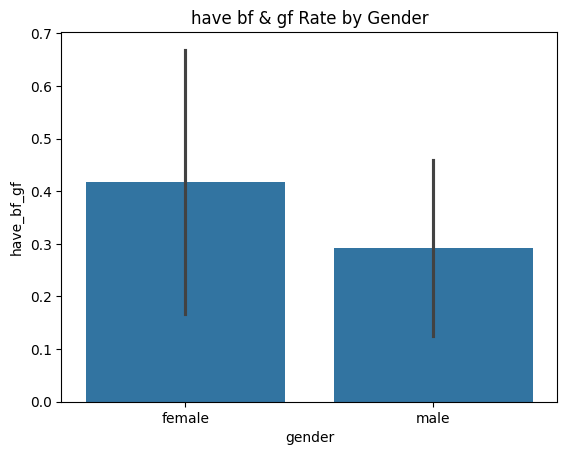

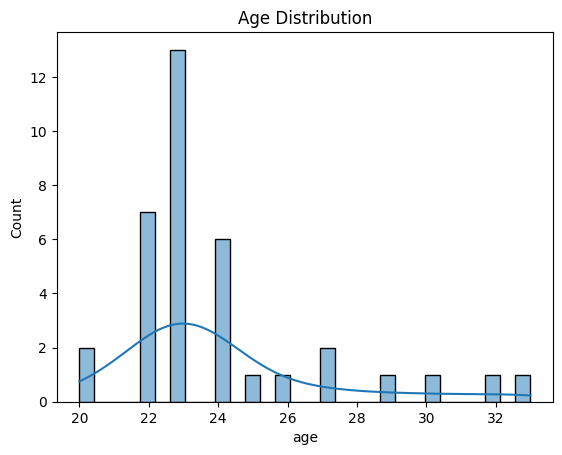

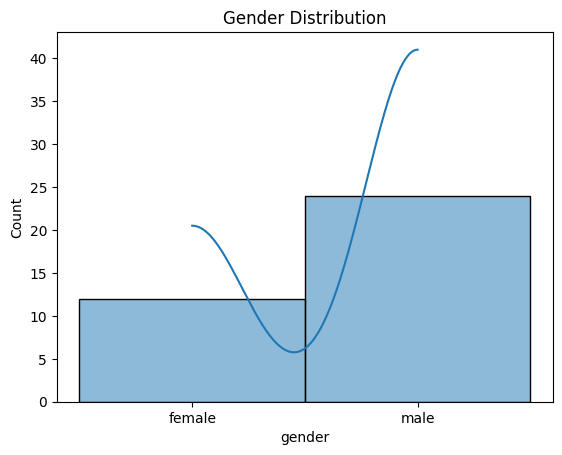

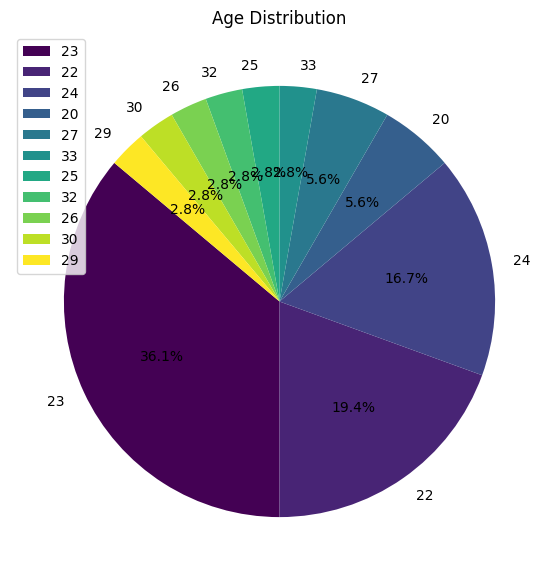

In [34]:
#Data Visualization: Visualization helps to gain more insights from the data
import seaborn as sns
import matplotlib.pyplot as plt

# have_bf_gf rate by gender
sns.barplot(x='gender', y='have_bf_gf', data=df)
plt.title('have bf & gf Rate by Gender')
plt.show()

# Age distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Gender distribution
sns.histplot(df['gender'], bins=30, kde=True)
plt.title('Gender Distribution')
plt.show()

#Age distribution using pie chart

age_distribution = df['age'].value_counts()

plt.figure(figsize=(10, 7))
age_distribution.plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis', legend=True)
plt.title('Age Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

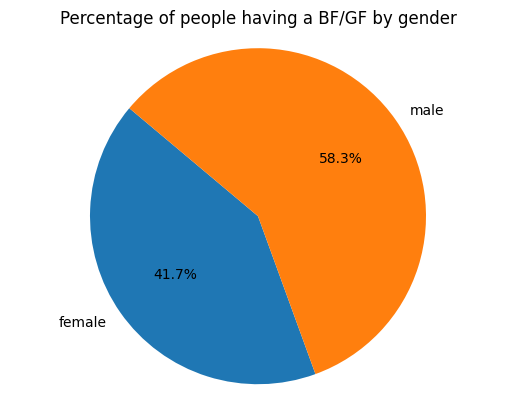

In [35]:
# Summarize data for pie chart
summary = df.groupby('gender')['have_bf_gf'].sum().reset_index()

# Create pie chart
labels = summary['gender']
sizes = summary['have_bf_gf']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of people having a BF/GF by gender')
plt.show()

In [36]:
# Crop Analysis and Predictions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('crop.csv')
print(data.head().to_string())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [39]:
# Data cleaning
# check for null values
print(data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [40]:
print(data.describe)

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>


In [41]:
# check for duplicate values

print(data.duplicated().sum())

0


<Axes: >

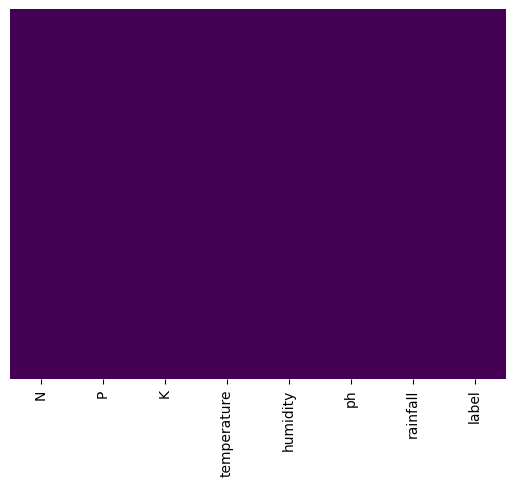

In [42]:
# check for null / missing values using heatmap

import seaborn as sns

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

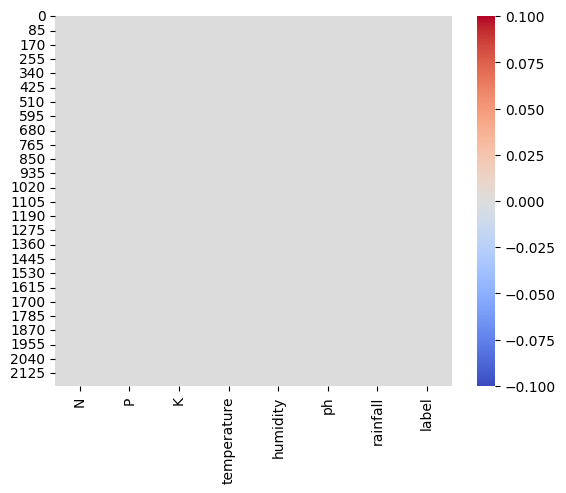

In [43]:
# Method 2:

# N is Nitrogen
# K is Potassium
# P is Phosphorous

sns.heatmap(data.isnull(), cmap= 'coolwarm')

plt.show()

In [44]:
# Distribution of temperature

print(data['temperature'].value_counts())

temperature
23.603016    1
20.879744    1
21.770462    1
23.004459    1
26.491096    1
            ..
26.800796    1
23.978982    1
26.527235    1
23.223974    1
24.515881    1
Name: count, Length: 2200, dtype: int64


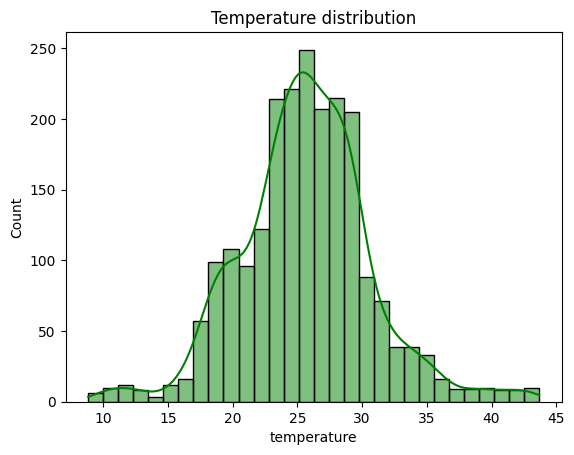

In [45]:
# Distribution of temperature(graph, normal distribution)

sns.histplot(data['temperature'], bins =30, kde=True, color='green')
plt.title('Temperature distribution')
plt.show()

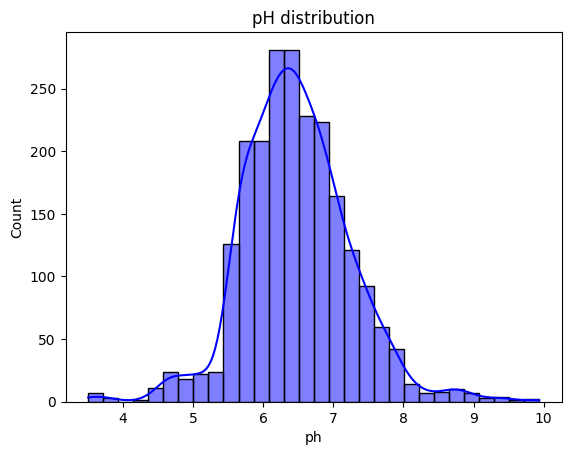

In [46]:
# Distribution of pH(graph, normal distribution)

sns.histplot(data['ph'], bins =30, kde=True, color='blue')
plt.title('pH distribution')
plt.show()

C:\Users\Edwin\AppData\Local\Temp\ipykernel_10740\482783910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=data, palette='plasma_r')


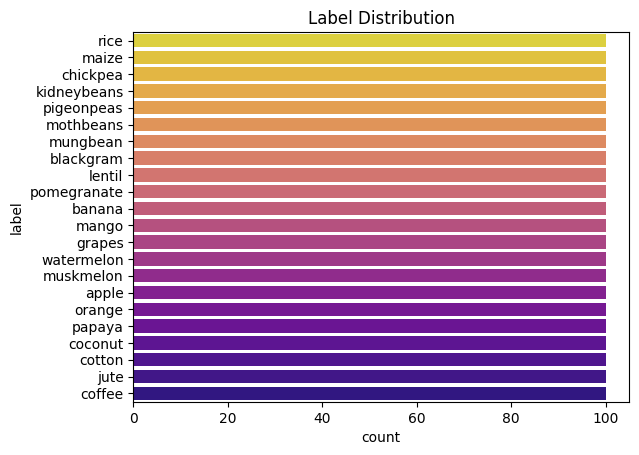

In [47]:
# Check if the dataset is balanced or not

sns.countplot(y='label', data=data, palette='plasma_r')
plt.title('Label Distribution')
plt.show()

C:\Users\Edwin\AppData\Local\Temp\ipykernel_10740\4258628797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='label', x='ph', data=data, palette='plasma_r')


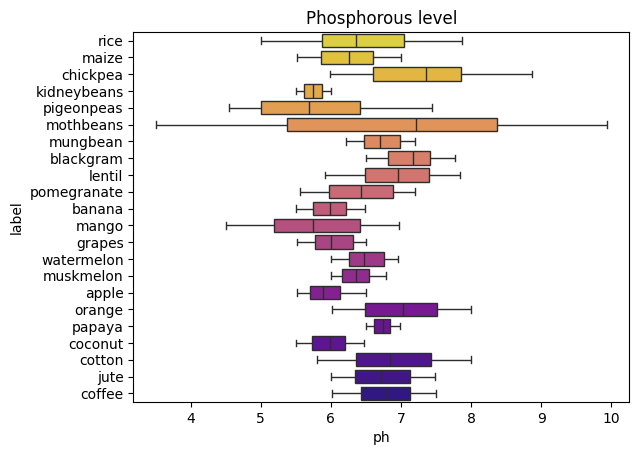

In [52]:
# Phosphorous Level

sns.boxplot(y='label', x='ph', data=data, palette='plasma_r')
plt.title('Phosphorous level')
plt.show()

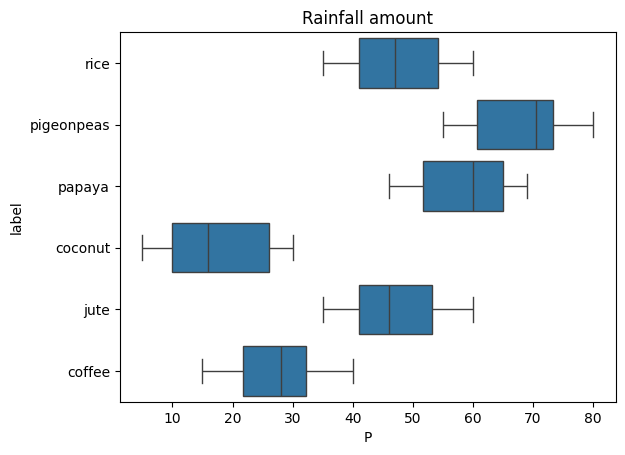

In [49]:
# Checking the rainfall amount

sns.boxplot(y='label', x='P', data=data[data['rainfall']>150])
plt.title('Rainfall amount')
plt.show()

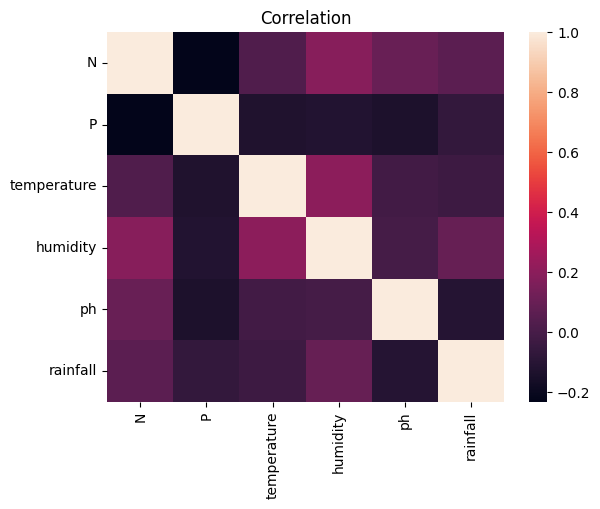

In [51]:
# # Visualization correlation
c =data.label.astype('category')
targets = dict(enumerate(c.cat.categories))
data['target'] = c.cat.codes

y = data.target
X = data[['N', 'P', 'temperature','humidity','ph','rainfall']]

# Create correlation visualization

sns.heatmap(X.corr())
plt.title("Correlation")
plt.show()